Step 1: Data Preparation

Financial Data
   Income  Expenses  Savings
0    4000      2500     1500
1    5000      2700     2300
2    6000      3000     3000
3    7000      3200     3800
4    8000      3500     4500
5    9000      3700     5300
6   10000      4000     6000
7   11000      4200     6800
8   12000      4500     7500
9   13000      4700     8300


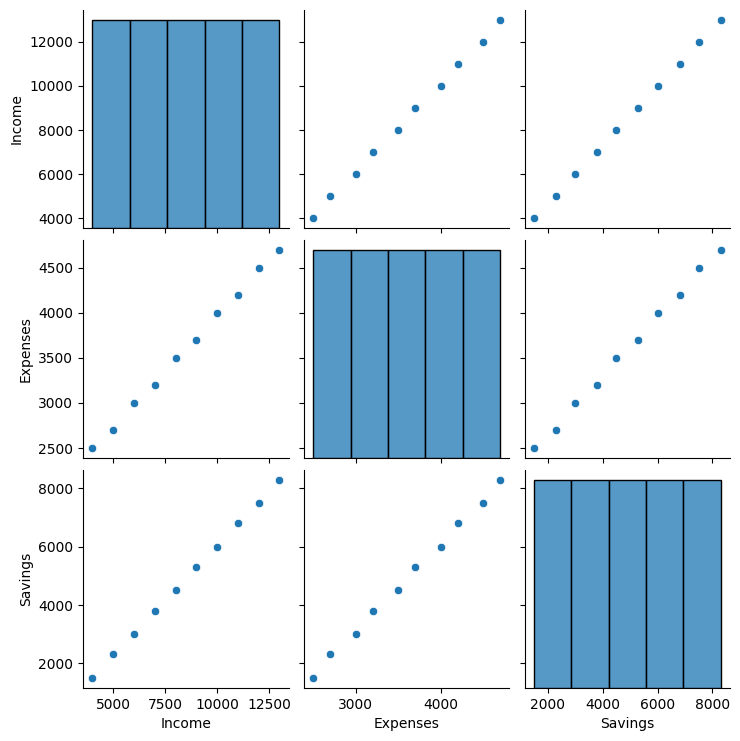

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import seaborn as sns

# Sample financial data
data = {
    'Income': [4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000],
    'Expenses': [2500, 2700, 3000, 3200, 3500, 3700, 4000, 4200, 4500, 4700],
    'Savings': [1500, 2300, 3000, 3800, 4500, 5300, 6000, 6800, 7500, 8300]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the data
print("Financial Data")
print(df)

# Plot the data
sns.pairplot(df)
plt.show()


Step 2: Preprocessing

In [2]:
# Split the data into features and target variable
X = df[['Income', 'Expenses']]
y = df['Savings']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 3: Linear Regression Model

In [3]:
# Create and train the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Compare actual vs predicted savings
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)


Mean Squared Error: 1.0339757656912846e-25
   Actual  Predicted
2    3000     3000.0
8    7500     7500.0


Step 4: K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


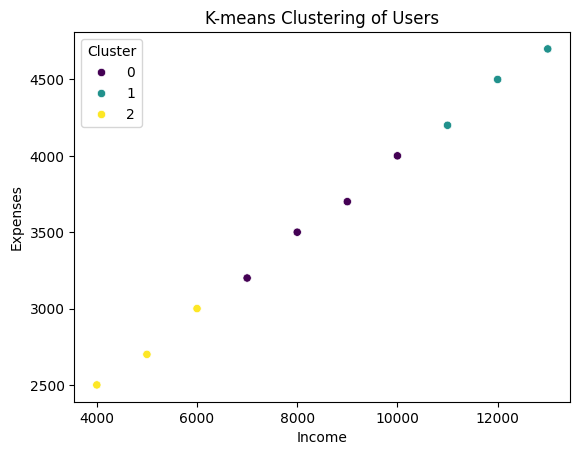

In [4]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df[['Income', 'Expenses', 'Savings']])

# Add cluster information to the DataFrame
df['Cluster'] = clusters

# Plot the clusters
sns.scatterplot(data=df, x='Income', y='Expenses', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Users')
plt.show()


Step 5: User Interface (Basic Console Input/Output)

In [5]:
# Function to provide advice based on the user's data
def provide_financial_advice(income, expenses):
    # Standardize the user input
    user_data = scaler.transform([[income, expenses]])

    # Predict savings
    predicted_savings = linear_regressor.predict(user_data)[0]

    # Determine the cluster
    user_cluster = kmeans.predict([[income, expenses, predicted_savings]])[0]

    advice = {
        0: "You have a balanced financial status. Keep up the good work!",
        1: "You should consider reducing your expenses to increase your savings.",
        2: "Great job! Your savings are in good shape. Consider investing."
    }

    return predicted_savings, advice[user_cluster]

# Example user input
user_income = 9000
user_expenses = 3700

predicted_savings, advice = provide_financial_advice(user_income, user_expenses)
print(f"Predicted Savings: ${predicted_savings:.2f}")
print(f"Advice: {advice}")


Predicted Savings: $5300.00
Advice: You have a balanced financial status. Keep up the good work!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
